In [31]:
import pandas as pd 

from sklearn.feature_extraction.text import TfidfVectorizer 


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , recall_score, f1_score, precision_score, confusion_matrix, accuracy_score


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [32]:
df = pd.read_csv("../data/processed/training_data.csv")

df

,text,label
0,softwar 15 99 understand oem softwar lead temp...,1
1,perspect ferc regulatori action client conf ca...,0
2,want tri ci 4 lis thought way expens viagra 1 ...,1
3,enron hpl actual decemb 11 2000 teco tap 30 00...,0
4,look cheap high qualiti softwar rotat napoleon...,1
...,...,...
31711,credit netco start plan louis attach electron ...,0
31712,everyth look hello visit amaz onlin shop nowsp...,1
31713,start date 2 5 02 hourahead hour 18 start date...,0
31714,corhshuck daren invoic paid us jame armstrong ...,0


In [33]:
# split data

# split data before vectorization

X_train,X_test,y_train , y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 25372
Test size: 6344


In [34]:

from clean import clean_text


# vectorisation
vectorizer = TfidfVectorizer(analyzer=clean_text)



# Fit vectorizer only on training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)




---
### Training



In [35]:
# train model
model = LogisticRegression()
model.fit(X_train_vec,y_train)

# Evaluate model
y_pred = model.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.7932

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3111
           1       0.79      0.81      0.80      3233

    accuracy                           0.79      6344
   macro avg       0.79      0.79      0.79      6344
weighted avg       0.79      0.79      0.79      6344




Confusion Matrix:


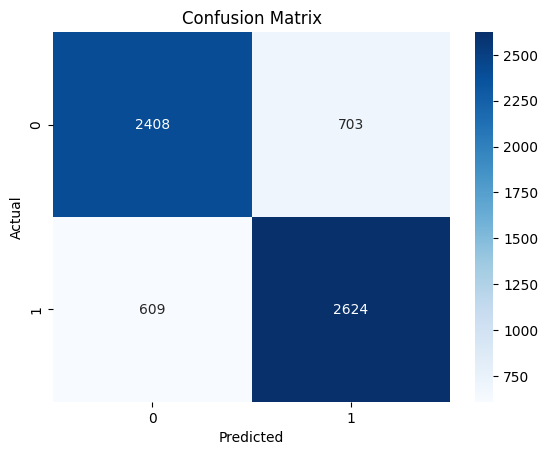

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Entraînement de Multinomial Naive Bayes : 


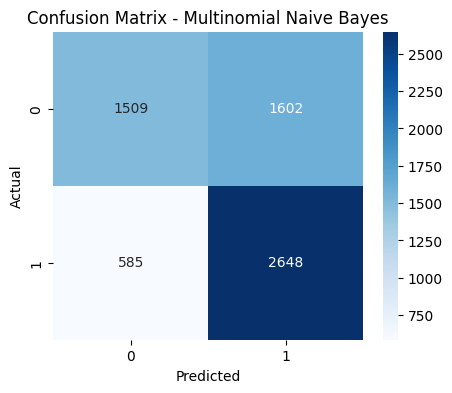

Entraînement de Logistic Regression : 


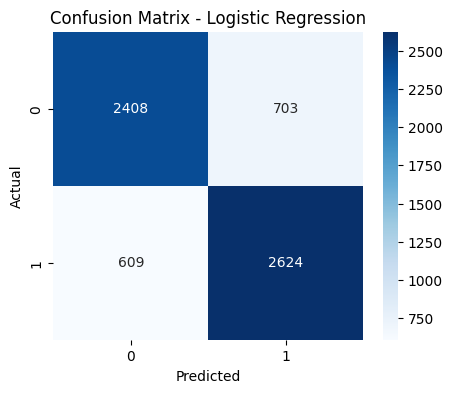

Entraînement de SVM : 


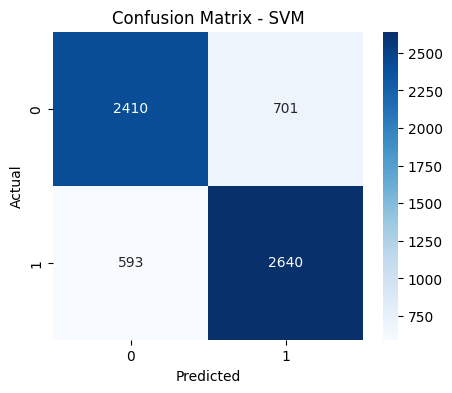

Entraînement de Random Forest : 


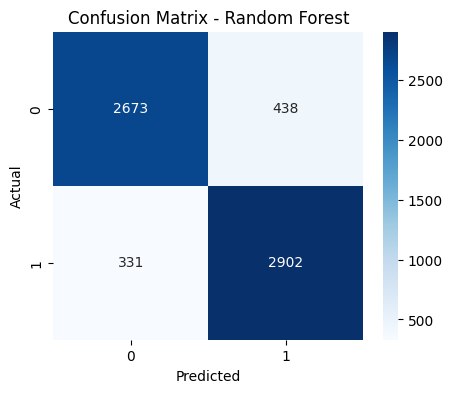

Entraînement de Gradient Boosting : 


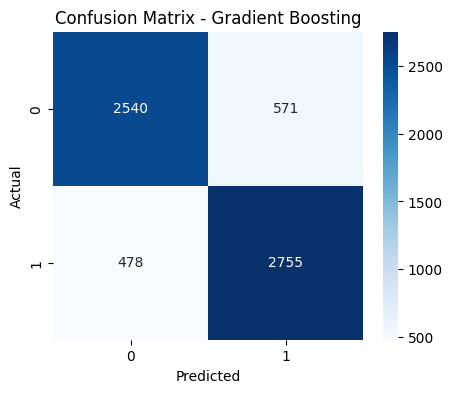

In [37]:
models = {
    "Multinomial Naive Bayes" : MultinomialNB(),
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "SVM" : LinearSVC(max_iter=1000),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier() 
}

results = []

for name, model in models.items() :
    print(f"Entraînement de {name} : ")
    model.fit(X_train_vec, y_train)
    
    predicts = model.predict(X_test_vec)
    
    accuracy = accuracy_score(y_test, predicts)
    precision = precision_score(y_test, predicts, pos_label=1)
    recall = recall_score(y_test, predicts, pos_label=1)
    f1 = f1_score(y_test, predicts, pos_label=1)

    results.append([name, accuracy, precision, recall, f1])

    # ---- CONFUSION MATRIX ----

    cm = confusion_matrix(y_test, predicts)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [38]:
results_df = pd.DataFrame(data=results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

results_df.sort_values("Accuracy",ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.878783,0.868862,0.897618,0.883006
4,Gradient Boosting,0.834647,0.828322,0.852150,0.840067
2,SVM,0.796028,0.790183,0.816579,0.803164
1,Logistic Regression,0.793190,0.788699,0.811630,0.800000
0,Multinomial Naive Bayes,0.655265,0.623059,0.819054,0.707738


In [39]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    "Multinomial Naive Bayes": {
        "alpha": [0.1, 0.5, 1.0, 2.0]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    },
    "SVM": {
        "C": [0.01, 0.1, 1, 10],
        "loss": ["hinge", "squared_hinge"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [10, 20, None],
        "max_features": ["sqrt", "log2"]
    },
    # "Gradient Boosting": {
    #     "learning_rate": [0.01, 0.1],
    #     "n_estimators": [100, 200],
    #     "max_depth": [2, 3, 5]
    # }
}


In [40]:
models = {
    "Multinomial Naive Bayes" : MultinomialNB(),
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "SVM" : LinearSVC(max_iter=1000),
    "Random Forest" : RandomForestClassifier(),
    # "Gradient Boosting" : GradientBoostingClassifier()  # to slow
}


# Hyperparameter tuning using GridSearchCV
optimized_results = []

for name, model in models.items():
    print(f"\nOptimizing {name}...")
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_vec, y_train)
    
    # Best model from grid search
    best_estimator = grid_search.best_estimator_
    
    # Predictions with best model
    y_pred = best_estimator.predict(X_test_vec)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    optimized_results.append([
        name,
        accuracy,
        precision,
        recall,
        f1,
        str(grid_search.best_params_)
    ])
    
    print(f"Best params: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")



Optimizing Multinomial Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'alpha': 0.1}
Best score: 0.6613

Optimizing Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'alpha': 0.1}
Best score: 0.6613

Optimizing Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.7949

Optimizing SVM...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.7949

Optimizing SVM...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\alibo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best params: {'C': 10, 'loss': 'hinge'}
Best score: 0.7962

Optimizing Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}
Best score: 0.8781
Best params: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}
Best score: 0.8781


In [41]:
# Display optimized results
optimized_results_df = pd.DataFrame(
    data=optimized_results, 
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Best Parameters"]
)

optimized_results_df.sort_values("Accuracy",ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,Best Parameters
3,Random Forest,0.885404,0.874030,0.905660,0.889564,"{'max_depth': 20, 'max_features': 'log2', 'n_e..."
2,SVM,0.798707,0.792289,0.819981,0.805898,"{'C': 10, 'loss': 'hinge'}"
1,Logistic Regression,0.795240,0.792322,0.810702,0.801407,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"
0,Multinomial Naive Bayes,0.654950,0.622997,0.817816,0.707236,{'alpha': 0.1}


In [42]:
# Compare baseline vs optimized results
print("=== Baseline Results ===")
print(results_df)
print("\n=== Optimized Results ===")
print(optimized_results_df[["Model", "Accuracy", "Precision", "Recall", "F1 Score"]])

=== Baseline Results ===
                     Model  Accuracy  Precision    Recall  F1 Score
0  Multinomial Naive Bayes  0.655265   0.623059  0.819054  0.707738
1      Logistic Regression  0.793190   0.788699  0.811630  0.800000
2                      SVM  0.796028   0.790183  0.816579  0.803164
3            Random Forest  0.878783   0.868862  0.897618  0.883006
4        Gradient Boosting  0.834647   0.828322  0.852150  0.840067

=== Optimized Results ===
                     Model  Accuracy  Precision    Recall  F1 Score
0  Multinomial Naive Bayes  0.654950   0.622997  0.817816  0.707236
1      Logistic Regression  0.795240   0.792322  0.810702  0.801407
2                      SVM  0.798707   0.792289  0.819981  0.805898
3            Random Forest  0.885404   0.874030  0.905660  0.889564


In [43]:
# Find best optimized model
best_model_idx = optimized_results_df['Accuracy'].idxmax()
best_model_name = optimized_results_df.loc[best_model_idx, 'Model']
best_accuracy = optimized_results_df.loc[best_model_idx, 'Accuracy']
best_params = optimized_results_df.loc[best_model_idx, 'Best Parameters']

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")

# Recreate and train the best model with optimal parameters
import ast
params = ast.literal_eval(best_params)

if best_model_name == "Multinomial Naive Bayes":
    best_model = MultinomialNB(**params)
elif best_model_name == "Logistic Regression":
    best_model = LogisticRegression(max_iter=1000, **params)
elif best_model_name == "SVM":
    best_model = LinearSVC(max_iter=1000, **params)
elif best_model_name == "Random Forest":
    best_model = RandomForestClassifier(**params)
elif best_model_name == "Gradient Boosting":
    best_model = GradientBoostingClassifier(**params)

best_model.fit(X_train_vec, y_train)

Best Model: Random Forest
Accuracy: 0.8854
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}


,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
import joblib

# Save the best model and vectorizer
joblib.dump(best_model, '../models/best_model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')

print(f"\nModel saved successfully!")
print(f"Model: ../models/best_model.pkl")
print(f"Vectorizer: ../models/vectorizer.pkl")


Model saved successfully!
Model: ../models/best_model.pkl
Vectorizer: ../models/vectorizer.pkl


In [45]:
# import json
# from datetime import datetime

# # Get detailed classification report
# y_pred_final = best_model.predict(X_test_vec)
# report = classification_report(y_test, y_pred_final, output_dict=True)

# # Prepare model information
# model_info = {
#     "model_name": best_model_name,
#     "best_parameters": ast.literal_eval(best_params),
#     "training_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
#     "dataset_info": {
#         "total_samples": len(df),
#         "train_samples": len(X_train),
#         "test_samples": len(X_test),
#         "features": X_train_vec.shape[1]
#     },
#     "performance_metrics": {
#         "accuracy": float(best_accuracy),
#         "precision": float(report['1']['precision']),
#         "recall": float(report['1']['recall']),
#         "f1_score": float(report['1']['f1-score']),
#         "support": int(report['1']['support'])
#     },
#     "class_distribution": {
#         "train": {
#             "spam": int(y_train.sum()),
#             "ham": int(len(y_train) - y_train.sum())
#         },
#         "test": {
#             "spam": int(y_test.sum()),
#             "ham": int(len(y_test) - y_test.sum())
#         }
#     },
#     "confusion_matrix": confusion_matrix(y_test, y_pred_final).tolist(),
#     "vectorizer_info": {
#         "type": "TfidfVectorizer",
#         "vocabulary_size": len(vectorizer.vocabulary_)
#     }
# }

# # Save to JSON
# with open('../models/model_info.json', 'w', encoding='utf-8') as f:
#     json.dump(model_info, f, indent=4, ensure_ascii=False)

# print("Model information saved to: ../models/model_info.json")
# print(json.dumps(model_info, indent=2))

In [46]:
# Train SVM with best hyperparameters
final_model = LinearSVC(C=10, loss='squared_hinge', max_iter=1000, random_state=42)
final_model.fit(X_train_vec, y_train)

# Evaluate the final model
y_pred_svm = final_model.predict(X_test_vec)

print("=== SVM Final Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

=== SVM Final Model Performance ===
Accuracy: 0.7970

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3111
           1       0.79      0.82      0.80      3233

    accuracy                           0.80      6344
   macro avg       0.80      0.80      0.80      6344
weighted avg       0.80      0.80      0.80      6344


Confusion Matrix:
[[2416  695]
 [ 593 2640]]


In [47]:
import joblib
import os 

os.makedirs("../backend/models",exist_ok=True)

# Save the final SVM model
joblib.dump(final_model, '../models/best_model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')

joblib.dump(final_model, '../backend/models/best_model.pkl')
joblib.dump(vectorizer, '../backend/models/vectorizer.pkl')

print("\nFinal SVM model saved!")
print("Model: ../models/best_model.pkl")
print("Vectorizer: ../models/vectorizer.pkl")


Final SVM model saved!
Model: ../models/best_model.pkl
Vectorizer: ../models/vectorizer.pkl


In [48]:
import json

# Save final model information to JSON
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

final_model_info = {
    "model_name": "SVM",
    "model_type": "LinearSVC",
    "best_parameters": {
        "C": 10,
        "loss": "squared_hinge",
        "max_iter": 1000,
        "random_state": 42
    },
    "dataset_info": {
        "total_samples": len(df),
        "train_samples": len(X_train),
        "test_samples": len(X_test),
        "features": X_train_vec.shape[1]
    },
    "performance_metrics": {
        "accuracy": float(accuracy_score(y_test, y_pred_svm)),
        "precision": float(report_svm['1']['precision']),
        "recall": float(report_svm['1']['recall']),
        "f1_score": float(report_svm['1']['f1-score']),
        "support": int(report_svm['1']['support'])
    },
    "class_distribution": {
        "train": {
            "spam": int(y_train.sum()),
            "ham": int(len(y_train) - y_train.sum())
        },
        "test": {
            "spam": int(y_test.sum()),
            "ham": int(len(y_test) - y_test.sum())
        }
    },
    "confusion_matrix": confusion_matrix(y_test, y_pred_svm).tolist(),
    "vectorizer_info": {
        "type": "TfidfVectorizer",
        "vocabulary_size": len(vectorizer.vocabulary_)
    }
}

# Save to JSON
with open('../models/model_info.json', 'w', encoding='utf-8') as f:
    json.dump(final_model_info, f, indent=4, ensure_ascii=False)

with open('../backend/models/model_info.json', 'w', encoding='utf-8') as f:
    json.dump(final_model_info, f, indent=4, ensure_ascii=False)

print("\nModel information saved to: ../models/model_info.json")
print(json.dumps(final_model_info, indent=2))


Model information saved to: ../models/model_info.json
{
  "model_name": "SVM",
  "model_type": "LinearSVC",
  "best_parameters": {
    "C": 10,
    "loss": "squared_hinge",
    "max_iter": 1000,
    "random_state": 42
  },
  "dataset_info": {
    "total_samples": 31716,
    "train_samples": 25372,
    "test_samples": 6344,
    "features": 37
  },
  "performance_metrics": {
    "accuracy": 0.7969735182849937,
    "precision": 0.7916041979010495,
    "recall": 0.8165790287658522,
    "f1_score": 0.8038976857490865,
    "support": 3233
  },
  "class_distribution": {
    "train": {
      "spam": 12930,
      "ham": 12442
    },
    "test": {
      "spam": 3233,
      "ham": 3111
    }
  },
  "confusion_matrix": [
    [
      2416,
      695
    ],
    [
      593,
      2640
    ]
  ],
  "vectorizer_info": {
    "type": "TfidfVectorizer",
    "vocabulary_size": 37
  }
}
